<a href="https://colab.research.google.com/github/Electra89/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[Click here to open Github repo.](https://github.com/Electra89/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering)

# **Problem Statement**


> The problem at hand is to conduct exploratory data analysis on a Netflix dataset in order to understand the types of content available in different countries, determine if Netflix has been prioritizing TV shows over movies in recent years, and cluster similar content based on text-based features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [92]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [93]:
# Load Dataset
Dataset_path ="https://raw.githubusercontent.com/Electra89/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv"
df=pd.read_csv(Dataset_path)

### Dataset First View

In [94]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [95]:
# Dataset Rows & Columns count
print(f"Number of Rows: {df.shape[0]} \nNumber of Columns: {df.shape[1]}")

Number of Rows: 7787 
Number of Columns: 12


### Dataset Information

In [96]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [97]:
# Dataset Duplicate Value Count
print(f"Duplicate Value Counts: {df.duplicated().sum()}")

Duplicate Value Counts: 0


#### Missing Values/Null Values

In [98]:
# Missing Values/Null Values Count
null_info = pd.DataFrame({

    'Null_value_Count': df.isna().sum(),
    'Percentage ': round(df.isnull().mean() * 100,2)
})

# Printing the tabular representation
print("-" * 50)
print("Null value count in each of the variable: ")
print("-" * 50)
print(null_info)
print("-" * 50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
              Null_value_Count  Percentage 
show_id                      0         0.00
type                         0         0.00
title                        0         0.00
director                  2389        30.68
cast                       718         9.22
country                    507         6.51
date_added                  10         0.13
release_year                 0         0.00
rating                       7         0.09
duration                     0         0.00
listed_in                    0         0.00
description                  0         0.00
--------------------------------------------------


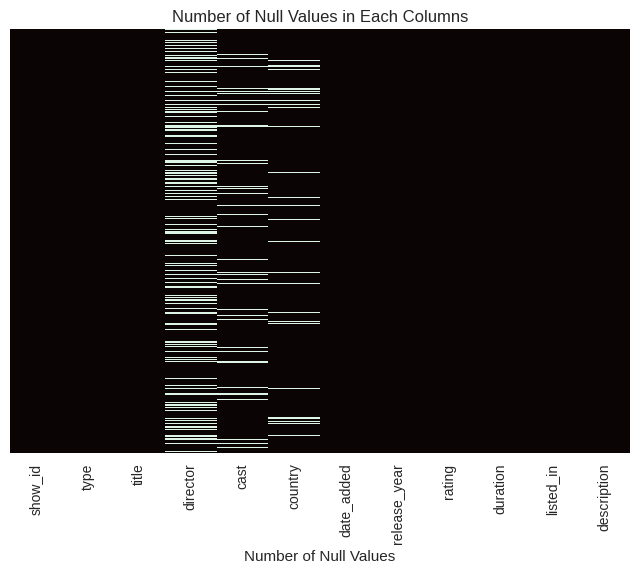

In [99]:
# Visualizing the missing values
null_counts = df.isnull().sum()

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')
plt.title('Number of Null Values in Each Columns')
plt.xlabel('Number of Null Values')
plt.show()

### What did you know about your dataset?

> * The Netflix Movies and TV Shows Clustering dataset comprises information on TV shows and movies available on Netflix as of 2019. With 7787 entries and 12 columns, the dataset includes a mix of categorical and numerical variables.
> * Some variables such as director, cast, country, date added, and rating contain null values.

## ***2. Understanding Your Variables***

In [100]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [101]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description

In [102]:
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

| Column         |              Description                                                           |
|----------------|-----------------------------------------------------------------------|
| **show_id**    | A unique identifier for each movie or TV show in the dataset.         |
| **type**       | Indicates whether the entry is a movie or a TV show.                   |
| **title**      | The title of the movie or TV show.                                    |
| director       | The name of the director(s) associated with the content.              |
| **cast**       | The names of the main cast members in the movie or TV show.           |
| **country**    | The country or countries where the content was produced or originated.|
| **date_added** | The date when the movie or TV show was added to Netflix.              |
| **release_year**| The year when the movie or TV show was originally released.           |
| **rating**     | The content rating assigned to the movie or TV show (e.g., PG, TV-MA).|
| **duration**   | The duration of the movie or TV show (e.g., "1h 30m" for 1 hour and 30 minutes).|
| **listed_in**  | The categories or genres in which the content is listed.              |
| **description**| A brief summary or description of the movie or TV show.               |


Answer Here

### Check Unique Values for each variable.

In [103]:
# Check Unique Values for each variable.
def unique_values(data_frame):
    for column in data_frame.columns:
        unique_values = data_frame[column].nunique()
        print(f"Column '{column}' has  unique value(s): {unique_values}")

# Call the function with your DataFrame
unique_values(df)

Column 'show_id' has  unique value(s): 7787
Column 'type' has  unique value(s): 2
Column 'title' has  unique value(s): 7787
Column 'director' has  unique value(s): 4049
Column 'cast' has  unique value(s): 6831
Column 'country' has  unique value(s): 681
Column 'date_added' has  unique value(s): 1565
Column 'release_year' has  unique value(s): 73
Column 'rating' has  unique value(s): 14
Column 'duration' has  unique value(s): 216
Column 'listed_in' has  unique value(s): 492
Column 'description' has  unique value(s): 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [104]:
Dataset_path ="https://raw.githubusercontent.com/Electra89/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv"
df=pd.read_csv(Dataset_path)

In [105]:
# Shape of the dataframe before Data Wrangling
print(f"Dataset size before dropping values : {df.shape}")

Dataset size before dropping values : (7787, 12)


In [106]:
new_df = df.copy()

In [107]:
# Fill missing values for 'director', 'cast', and 'country' columns with 'Unknown'
new_df[['director','cast','country']] = new_df[['director','cast','country']].fillna('Unknown')

In [108]:
# Fill missing values for 'rating' with the mode value
new_df['rating']= new_df['rating'].fillna(new_df['rating'].mode()[0])

In [109]:
# Drop rows with any remaining missing values
new_df.dropna(axis=0, inplace=True)

In [110]:
new_df['duration']=new_df['duration'].apply(lambda x: int(x.split()[0]))    # need to check

In [111]:
# Shape of the dataframe after Data Wrangling
print(f"Dataset size after dropping  : {new_df.shape}")

Dataset size after dropping  : (7777, 12)


## Handling nested columns

In [112]:
temp_df = new_df.copy()

In [113]:
def unnest_column(df, column_name):
    # Split the column and unnest
    unnested_df = df[column_name].apply(lambda x: str(x).split(', ')).tolist()
    df = pd.DataFrame(unnested_df, index=df['title']).stack()

    # Create a DataFrame, reset the index, and set the column names
    df = df.reset_index(level=1, drop=True).reset_index(name=column_name)

    return df

# Applying the function for 'director', 'cast', 'listed_in', and 'country'
dt1 = unnest_column(temp_df, 'director')
dt2 = unnest_column(temp_df, 'cast')
dt3 = unnest_column(temp_df, 'listed_in')
dt4 = unnest_column(temp_df, 'country')


In [114]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [115]:
dfs = (
    dt2.merge(dt1, on='title', how='inner')
       .merge(dt3, on='title', how='inner')
       .merge(dt4, on='title', how='inner')
)

# Merging with the original DataFrame
temp_df = dfs.merge(new_df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration', 'description']],
              on='title', how='left')


In [116]:
temp_df.head()

,title,cast,director,listed_in,country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4,In a future where the elite inhabit an island ...


In [117]:
# Typecasting string object to datetime object of date_added column
temp_df['date_added']= pd.to_datetime(temp_df['date_added'])

# Extracting date, day, month and year from date_added column
temp_df["day_added"]= temp_df["date_added"].dt.day
temp_df["month_added"]= temp_df["date_added"].dt.month
temp_df["year_added"]= temp_df["date_added"].dt.year

# Dropping date_added
temp_df.drop('date_added', axis=1, inplace=True)

In [118]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   int64 
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(2), object(10)
memory usage: 789.9+ KB


## Remaping ratings column  


* **Adult Content** : TV-MA, NC-17, R
* **Children Content** : TV-PG, PG, TV-G, G
* **Teen Content** : PG-13, TV-14
* **Family-friendly Content** : TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated** : NR, UR


In [119]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

new_df['rating'].replace(rating_map, inplace = True)
new_df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [120]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   int64 
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(2), object(10)
memory usage: 789.9+ KB


### What all manipulations have you done and insights you found?

> * Null values in the **'director'**, **'cast'**, and **'country'** columns have been filled with the string 'Unknown' using the fillna method.
> * Null values in the **'rating'** column have been filled with the mode (most frequent value) of the column using the fillna method. Note that for **'rating'**, the inplace=True parameter has been used.
> * The **'date_added'** column has been converted to datetime format using the pd.to_datetime method.
 * We have also extracted the following features:
   *  'date' from 'date_added'.
   *  'month' from 'date_added'.
   *  'year' from 'date_added'.
> * Rows containing any remaining missing values after the above manipulations have been dropped using the dropna method
> * We have seen that the 'rating' column contains various coded categories, so we have decided to create 5 bins and distribute the values accordingly:
  * **Adult** : TV-MA, NC-17
  * **Restricted** : R, UR
  * **Teen** : PG-13, TV-14
  * **All Ages** : TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  count of Movies vs TV Shows on Netflix.

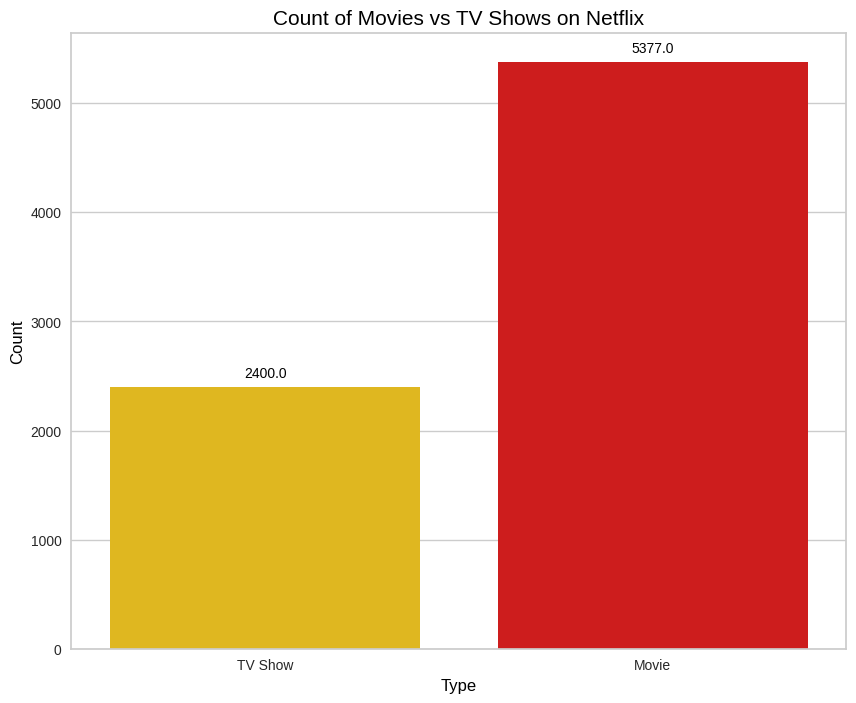

In [121]:
# count of Movies vs TV Shows on Netflix.


# Creating the countplot to visualize the data
plt.figure(figsize = (10,8))

type_countplot = sns.countplot(data = new_df, x='type', palette='hot_r')

# Adding  a title to the plot
plt.title('Count of Movies vs TV Shows on Netflix', fontsize=15, color='black')

# Adding count annotations on top of the bars
for p in type_countplot.patches:
    type_countplot.annotate(f'{p.get_height()}',
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10),
                                textcoords='offset points', fontsize=10, color='black')

# Adding labels for the x and y axes
plt.xlabel('Type', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> The countplot was chosen to visualize the distribution of movie and TV show types in the Netflix dataset due to its suitability for representing categorical data, enabling straightforward comparison of counts, and its simplicity, which facilitates clear communication of the distribution.

##### 2. What is/are the insight(s) found from the chart?

> The chart shows there are more movies (5377) than TV shows (2400) in the Netflix dataset. Basically, Netflix has a lot more movies than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Positive Impact**: Insights guide smart content decisions, optimizing Netflix's content strategy and tailoring user experiences for increased engagement.
> * **Negative Impact**: Imbalances in content types may lead to dissatisfaction, highlighting the importance of diversification. Missing trend opportunities can result in a competitive disadvantage.

#### Chart - 2 distribution of release years of Netflix shows.

In [122]:
# Distribution of release years of Netflix shows.

# Creating the histogram with Plotly
release_year_hist = px.histogram(new_df, x='release_year', nbins=30, title='Distribution of Release Years of Netflix Shows',
                                 labels={'release_year': 'Release Year'}, color_discrete_sequence=['red'],width=800, height=600,text_auto=True)

# Updating layout
release_year_hist.update_layout(
    # Adding  a title to the plot
    title=dict(text='Distribution of Release Years of Netflix Shows', x=0.5, y=0.95, xanchor='center', yanchor='top'),
    # Adding labels for the x and y axes
    xaxis=dict(title='Release Year', showgrid=True,title_font=dict(size=18)),
    yaxis=dict(title='Count', showgrid=True,title_font=dict(size=18)),
    showlegend=False
)

# Displaying the plot
release_year_hist.show()

##### 1. Why did you pick the specific chart?

> A histplot was chosen to show how many Netflix shows were released each year. It helps easily see trends, peaks, and gaps in the release history over the years, giving a clear picture of Netflix's content distribution.

##### 2. What is/are the insight(s) found from the chart?

> * The chart highlights a spike in Netflix content production in 2015-2019, showcasing a recent emphasis on new releases.
> * The distribution of content releases over time can reveal growth trends in Netflix's library. The chart shows an increasing trend in content releases over the years, it suggests that Netflix has been expanding its content library consistently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> the histogram of Netflix shows' release years can contribute to a positive business impact. Knowing when Netflix shows were released helps Netflix plan better. They can focus on the popular years, offer a variety of shows, and make decisions that match what viewers like. This can make users happier and more engaged with Netflix.

#### Chart - 3

In [123]:

# Creating a pie chart with Plotly
fig = px.pie(new_df['country'].value_counts().head(),
             labels=new_df['country'].value_counts().head().index,
             values=new_df['country'].value_counts().head().values,
             title='Top 5 Countries in Netflix Shows',
             names=new_df['country'].value_counts().head().index,
             color_discrete_sequence=px.colors.qualitative.Set1,width=800, height=600)

# Adding interactivity to the chart
fig.update_layout(title=dict( x=0.5, y=0.95, xanchor='center', yanchor='top'))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(legend_title='Country')

# Displaying the plot
fig.show()

##### 1. Why did you pick the specific chart?

> This interactive pie chart allows to explore the distribution of shows among the top 5 countries with the highest number of shows. and can hover over the slices to see the country name, count, and percentage, providing a clear visualization of the relative proportions of shows in each country.

##### 2. What is/are the insight(s) found from the chart?

> * The largest slice indicates that the United States has the highest number of shows, highlighting its significant contribution to Netflix's content library.
> * Understanding the geographical distribution helps Netflix strategize content acquisition and production efforts to cater to diverse viewer preferences across different regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Strategic Decision-making**: Insights on dominant countries guide content strategies, enhancing viewer satisfaction and potential for increased viewership.
> * **Competitor Analysis**: Assessing market share relative to other countries aids in understanding the competitive landscape, supporting strategic positioning.


#### Chart - 4 Top 10 countries with the most Netflix shows

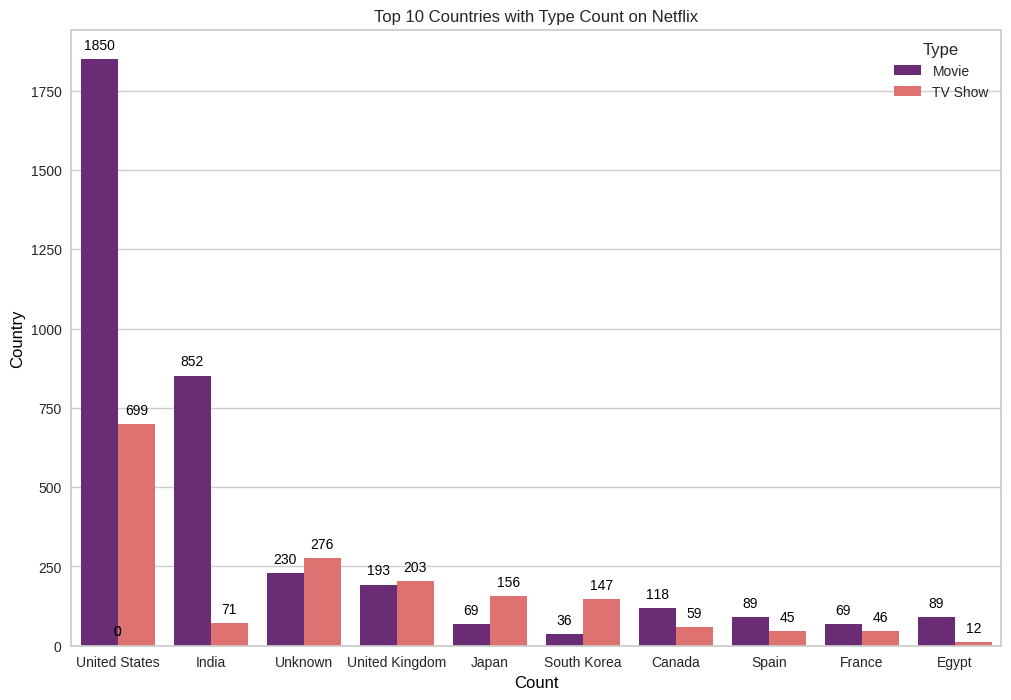

In [124]:

# Create a DataFrame with the top 10 countries
top_countries = new_df['country'].value_counts().head(10).index

# Filter data for the top 10 countries
top_countries_data = new_df[new_df['country'].isin(top_countries)]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x='country', hue='type', order=top_countries, data=top_countries_data, palette='magma')

# Add count annotations on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10),
                 textcoords='offset points', fontsize=10, color='black')

# Adding a title to the plot
plt.title('Top 10 Countries with Type Count on Netflix')
# Adding labels for the x and y axes

plt.xlabel('Count', fontsize=12, color='black')
plt.ylabel('Country', fontsize=12, color='black')
plt.legend(title='Type', loc='upper right')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> The countplot  is chosen for this task because it effectively visualizes the frequency count of each category (countries) on the x-axis and the count on the y-axis. This makes it easy to compare the distribution of movie and TV show counts across different countries in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

> * The **United States** is a major contributor to Netflix, leading in both movies (1850) and TV shows (705), underscoring its significant influence on the platform's content.
> * **India** stands out with a substantial movie count (852), but there's room for growth in TV shows (71), indicating a strong presence in movies.
> * The **United Kingdom** maintains a balanced content output with comparable counts in both movies (193) and TV shows (204), reflecting a diverse content landscape.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Targeted Investment**: Insights guide strategic content investments, tailoring production to the influential U.S. market and recognizing growth potential in India.
> * **Market expansion**: Identifying countries with a higher count of movies and TV shows can provide insights into potential markets for expansion. Netflix can prioritize expanding its presence in countries where there is already a substantial demand for their content.

#### Chart - 5 Distribution of Content Ratings on Netflix

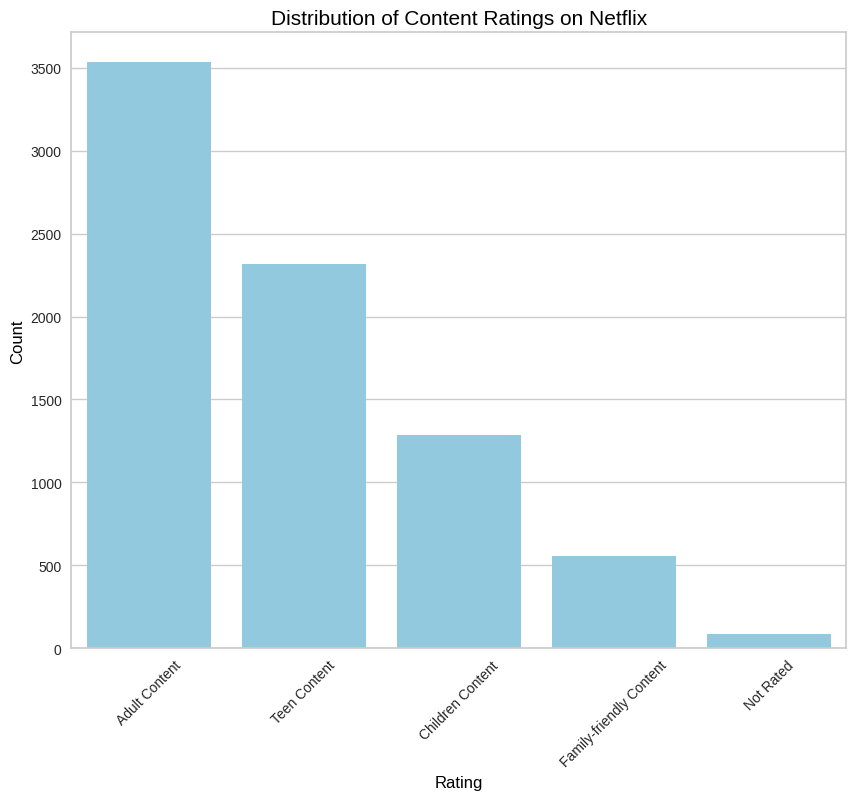

In [125]:
# Distribution of Content Ratings on Netflix

# Creating the countplot to visualize the data
plt.figure(figsize=(10, 8))

rating_countplot = sns.countplot(data=new_df, x='rating', order=new_df['rating'].value_counts().index, color='skyblue')

# Adding a title to the plot
plt.title('Distribution of Content Ratings on Netflix', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Rating', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> The countplot is a suitable choice for visualizing the distribution to show how content ratings are distributed on Netflix. It's a good pick because it displays different ratings on the x-axis and shows how many times each rating appears on the y-axis. This makes it easy to see which ratings are more common and gives a quick overview of Netflix's content.

##### 2. What is/are the insight(s) found from the chart?

> * TV-MA and TV-14 ratings have the highest counts, indicating a significant presence of content suitable for mature audiences.
> * Netflix offers content across a range of ratings, including TV-PG, R, PG-13, TV-Y, TV-Y7, and others, showcasing a diverse content library catering to various audience preferences.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Viewer Segmentation**: Knowledge of specific ratings' popularity helps in better understanding viewer segments. This segmentation can be leveraged for personalized recommendations and targeted marketing campaigns, improving user engagement.
> * **Content Diversification**: Recognizing the diversity in ratings allows Netflix to continue offering a wide range of content suitable for different audiences. This diversification can attract a broader user base and enhance customer satisfaction.

#### Chart - 6 Poplular genres on netflix

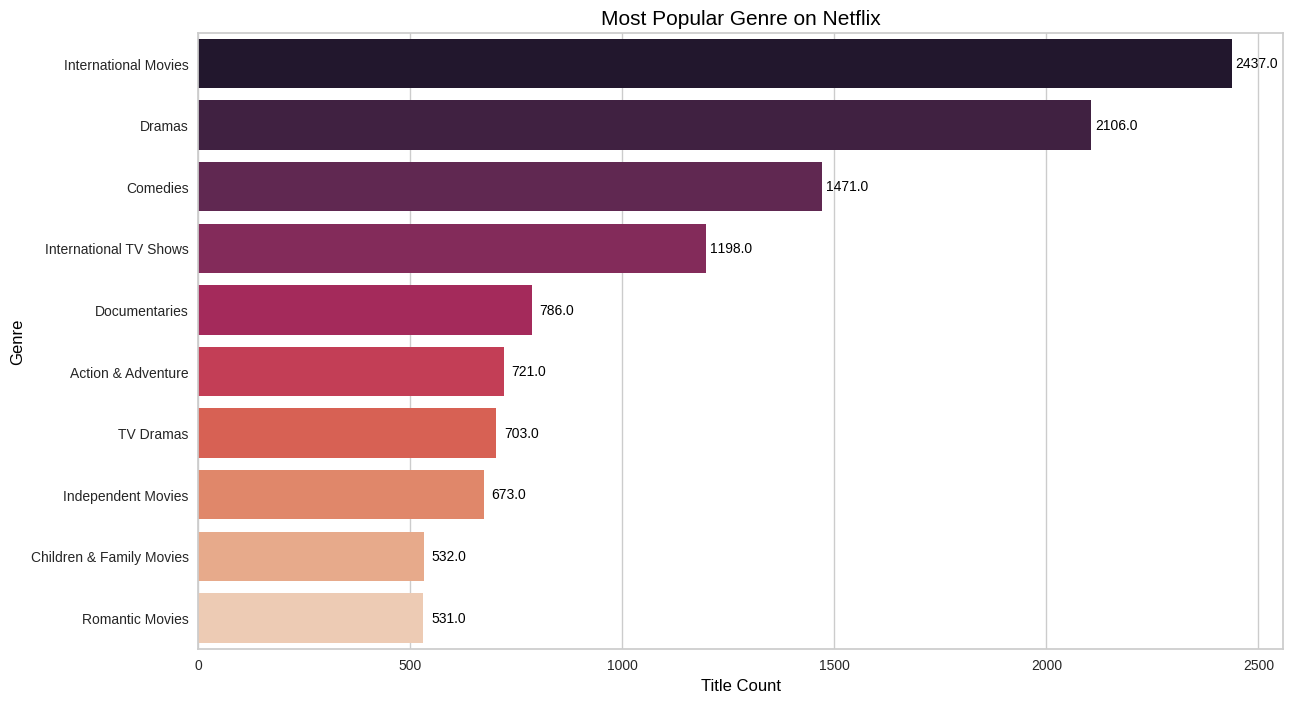

In [126]:
# Creating the countplot to visualize the data
plt.figure(figsize=(14, 8))

df_genre = temp_df.groupby(['listed_in']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
ax = sns.barplot(y="listed_in", x='title', data=df_genre , palette = 'rocket')

# Adding count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(18, 0), textcoords='offset points', fontsize=10, color='black')

# Adding a title to the plot
plt.title('Most Popular Genre on Netflix', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Title Count', fontsize=12, color='black')
plt.ylabel('Genre', fontsize=12, color='black')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> A bar plot is suitable for visualizing the count of unique titles in each genre on Netflix because it provides a clear representation of the distribution of titles across different genres.

##### 2. What is/are the insight(s) found from the chart?

> * **"International Movies"** and **"Dramas"** are the most prevalent genres on Netflix, with a significantly higher count of unique titles.
> * Genres like **"Documentaries," "Action & Adventure," and "TV Dramas"** have a notable presence, showcasing a diverse range of content available on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Targeted Marketing**: Utilizing insights on popular genres enables Netflix to customize marketing campaigns, recommendations, and ads for specific viewer preferences, boosting the attraction and retention of subscribers.
> * **Personalized Recommendations**: Genre insights enhance recommendation algorithms, allowing Netflix to offer more precise and personalized content suggestions, elevating the overall user experience.

#### Chart - 7  Past 20 Years Release  Content on Netflix

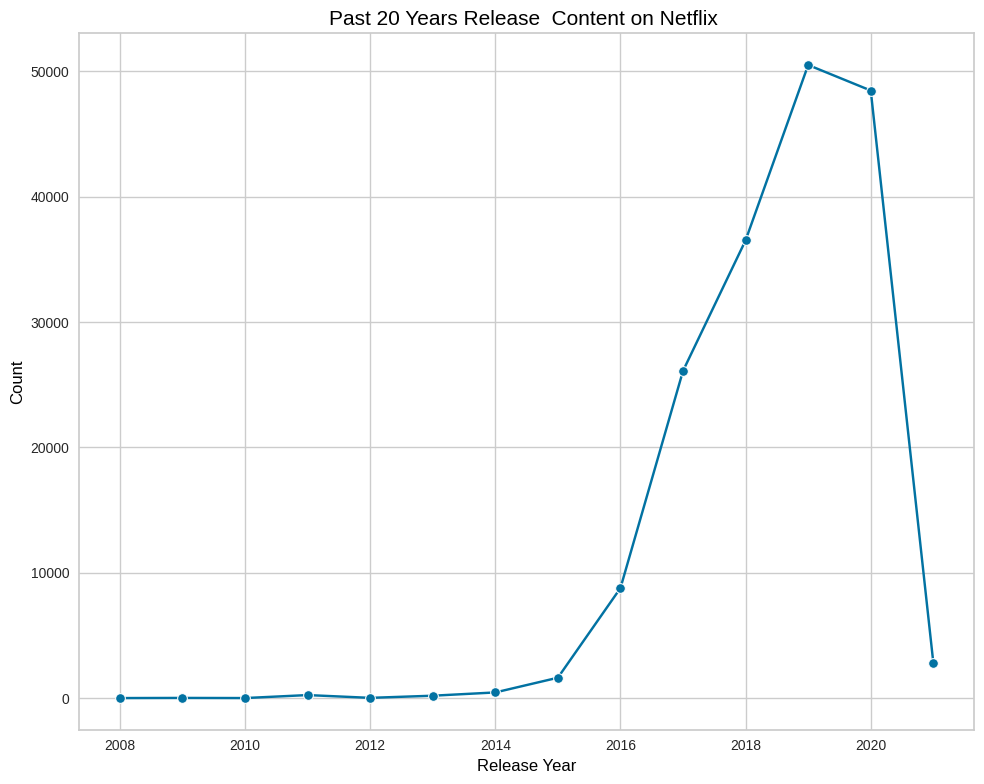

In [127]:
# Counting the occurrences of each year in 'year_added'
year_counts = temp_df['year_added'].value_counts().head(20).sort_index()

# Creating a line plot to visualize the data
plt.figure(figsize=(10, 8))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')

# Adding a title to the plot
plt.title('Past 20 Years Release  Content on Netflix ', fontsize=15, color='black')

# Adding grid and labels for the x and y axes
plt.grid(True)
plt.xlabel('Release Year', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')

# Displaying the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

> The line chart is suitable for visualizing the distribution of Netflix content across different release years. It effectively shows the trend and variation in content production over time.

##### 2. What is/are the insight(s) found from the chart?

> * A noticeable surge in content production is observed from 2016 onwards, reaching its peak in 2018. This period aligns with Netflix's strategic focus on original content creation and global expansion.
> * The distribution of content releases over time can reveal growth trends in Netflix's library. The chart shows an increasing trend in content releases over the years, it suggests that Netflix has been expanding its content library consistently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **Content Strategy and Planning**: The insights from the line chart can inform Netflix's content strategy and planning. Understanding the historical trends in content production allows for more informed decisions on resource allocation, budgeting, and focus areas for future content creation.
> * **Audience Engagement**: By analyzing the growth trends, Netflix can align content releases with periods of increased audience engagement. This strategic timing can maximize viewership, subscriber retention, and overall customer satisfaction.

#### Chart - 8  Top 20 Genres on Netflix

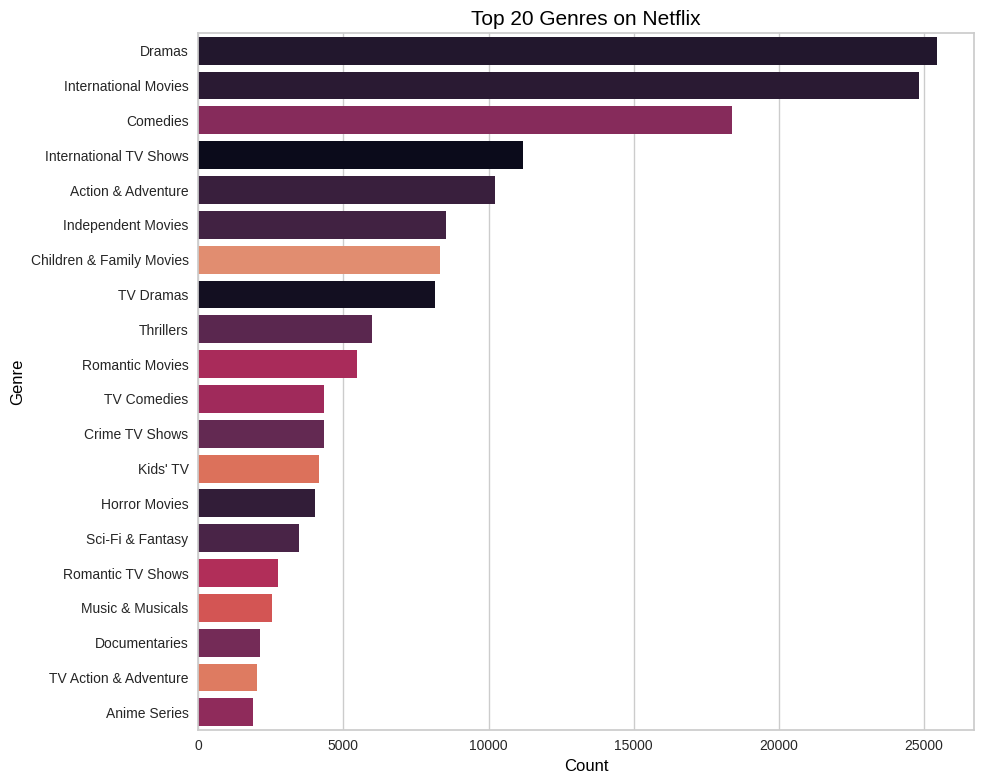

In [128]:
# Top 20 Genres on Netflix
top_genres = temp_df['listed_in'].value_counts().index[0:20]
# Creating a line plot to visualize the data
plt.figure(figsize=(10, 8))
sns.countplot(y='listed_in', order=top_genres, data=temp_df,hue="listed_in", palette="rocket")

# Adding a title to the plot
plt.title('Top 20 Genres on Netflix', fontsize=15, color='black')

# Adding grid and labels for the x and y axes

plt.xlabel('Count', fontsize=12, color='black')
plt.ylabel('Genre', fontsize=12, color='black')

# Displaying the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

> A countplot is an appropriate choice for visualizing the distribution of genres on Netflix, as it effectively displays the frequency of each genre category.

##### 2. What is/are the insight(s) found from the chart?

> The chart shows the number of different types of shows and movies on Netflix. It indicates that Dramas and International Movies are the most common genres, followed by Comedies and International TV Shows. This information is useful for making decisions about what kind of content to focus on or recommend to users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> * **User Engagement**: Analyzing the count of different genres allows businesses to identify popular content types, leading to personalized recommendations and targeted marketing. This enhances user engagement and satisfaction.
> * **International Expansion**: Recognizing the popularity of International Movies and TV Shows can inform decisions about expanding content libraries in specific regions, potentially attracting a global audience.

#### Chart - 14 - What is the Distribution of Content Rating in each highest content creating countries?

In [129]:
temp_df['rating'].replace(rating_map, inplace = True)

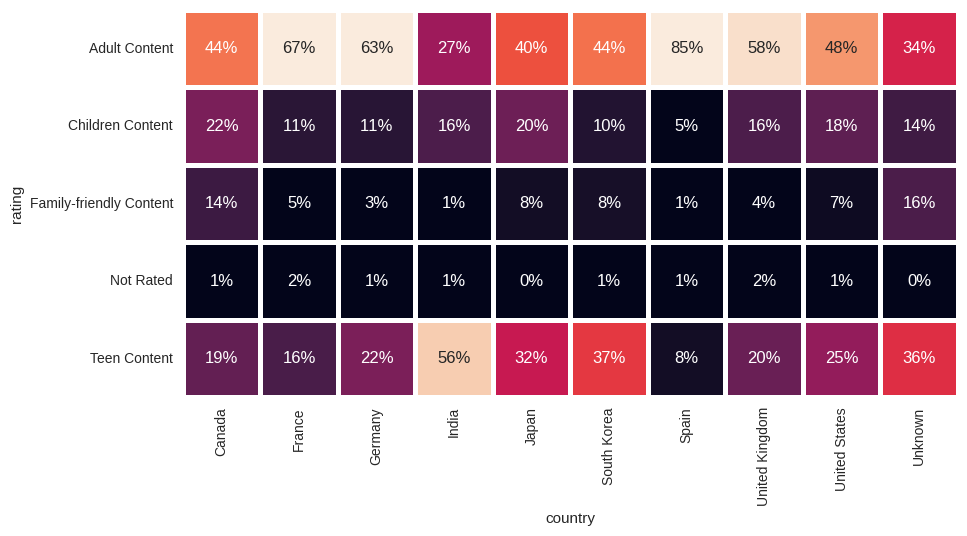

In [130]:
temp_df['count'] = 1
data = temp_df.groupby('country')[['country', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data = data['country']
df_heatmap = temp_df.loc[temp_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['rating'], normalize="index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = df_heatmap.columns
rating_order = df_heatmap.index

# Calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order, country_order], square=True, linewidth=2.5, cbar=False, annot=True, fmt='1.0%',
            vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

> The heatmap was chosen for its ability to visually represent the distribution of content ratings across different countries.

##### 2. What is/are the insight(s) found from the chart?

> * We found that **most of the countries produces content related to Adult and Teen.**
> * Amomg all the countries **INDIA has less content in Adult segment than teen content.**
> * **85% of content is Adult content from spain.**
> * **Canada produces more content related to Children and Family-Friendly content**.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

> *Hypothetical Statement 1:*
> * **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.
> * **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

> *Hypothetical Statement 2:*
> * **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.
> * **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

> *Hypothetical Statement 3:*
> * **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.
> * **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.
> **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [131]:
# Import necessary libraries
from statsmodels.stats.proportion import proportions_ztest

# Subset the data to only include drama and comedy movies
subset = temp_df[temp_df['listed_in'].str.contains('Dramas') | temp_df['listed_in'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['listed_in'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['listed_in'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic:', z_stat)
print('p-value:', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


z-statistic: 64.79201646375707
p-value: 0.0
Reject the null hypothesis.


> We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

##### Which statistical test have you done to obtain P-Value?

> The statistical test we have used to obtain the P-value is the z-test for proportions.

##### Why did you choose the specific statistical test?

> We used a z-test for proportions because we wanted to compare the proportions of two types of movies (drama and comedy) in a sample. The test helps us figure out if the difference we see in the proportions is likely due to a real distinction or just random chance. It's like checking if the observed difference is big enough to be considered meaningful. The test looks at the probability of seeing such a difference if there was actually no difference in the entire population.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

> **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [132]:
# Import necessary libraries
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = temp_df[(temp_df['type'] == 'TV Show') & (temp_df['release_year'] == 2020)]
tv_2021 = temp_df[(temp_df['type'] == 'TV Show') & (temp_df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)

# Print the results
print('t-value:', t)
print('p-value:', p)

# Set the significance level
alpha = 0.05

# Print the interpretation of the results
if p < alpha:
    print("Reject the null hypothesis.")

else:
    print("Fail to reject the null hypothesis.")



t-value: -6.002151232542292
p-value: 7.23381843379902e-09
Reject the null hypothesis.


> we conclude That average duration of TV shows added in 2020 on Netflix is significantly different from the average duration of TV shows added in 2021.

##### Which statistical test have you done to obtain P-Value?

> The statistical test used to obtain the P-Value is a two-sample t-test.

##### Why did you choose the specific statistical test?

> We used a two-sample t-test because we wanted to compare the average durations of two groups of TV shows: those added in 2020 and those added in 2021. The test helps us figure out if the difference in average durations is likely due to a real distinction or just random chance. We also assumed that the variability in durations between the two groups might not be the same, so we used a version of the t-test that doesn't assume equal variability.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

> **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

#### 2. Perform an appropriate statistical test.

In [133]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Separate data into movies and TV shows
df_movies = temp_df[temp_df['type'] == 'Movie']
df_tvshows = temp_df[temp_df['type'] == 'TV Show']

# Calculate the proportion of TV shows and movies from the United States
tv_proportion = np.sum(df_tvshows['country'].str.contains('United States')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['country'].str.contains('United States')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic:', z_stat)
print('p-value:', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


z-statistic: -26.16683083504556
p-value: 6.3413514729939e-151
Reject the null hypothesis.


> We conclude that the proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

##### Which statistical test have you done to obtain P-Value?

> The statistical test used to obtain P-Value is a two-sample proportion test.

##### Why did you choose the specific statistical test?

> We used this statistical test because it's good for comparing two proportions. It helps us figure out if the difference between the proportions of TV shows and movies from the United States is likely just random chance or if there's a real distinction between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [134]:
temp_df.isna().sum()

title           0
cast            0
director        0
listed_in       0
country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
count           0
dtype: int64

Let's move ahead, as we have already dealed with null/missing values from our dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

> There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [135]:
#@markdown # Outlier detector
def Outlier_detector(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [136]:
# Defining  empty lists for different Datatypes
numeric_columns = []
# Seprating columns and categorize based on data type
for column in temp_df.columns:
    if temp_df[column].dtype in ['float64', 'int64']:
      numeric_columns.append(column)

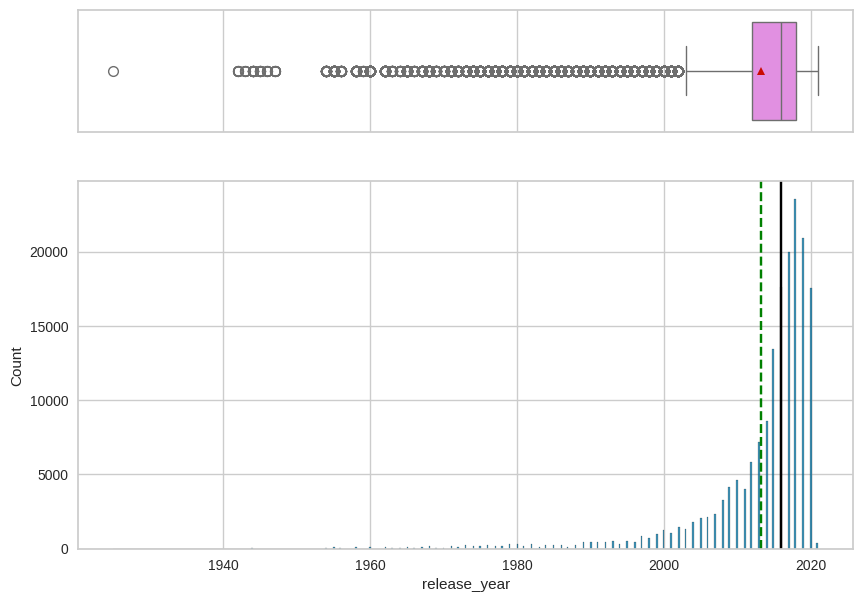

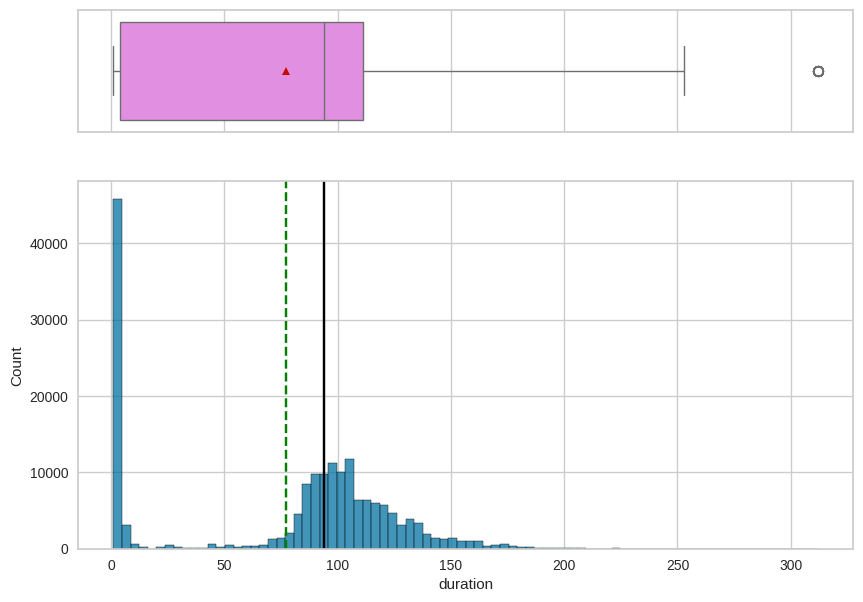

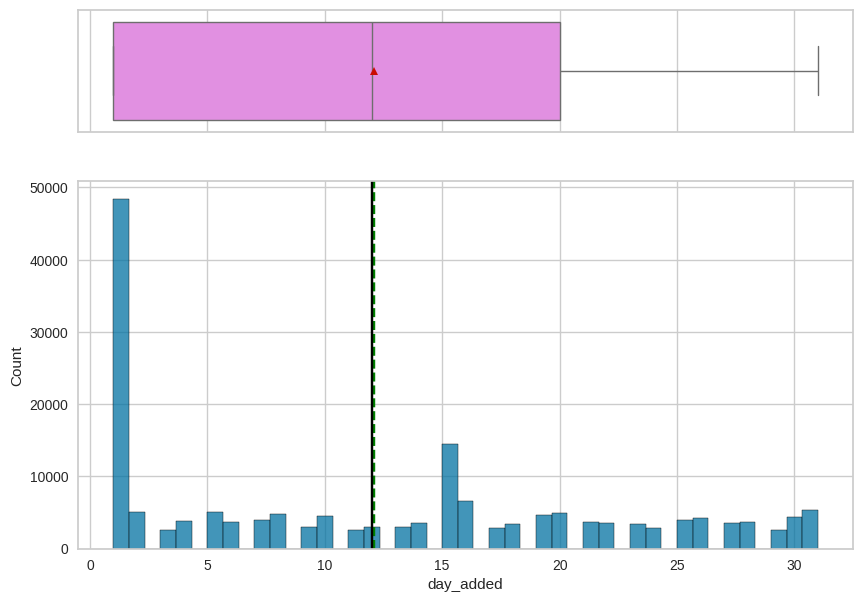

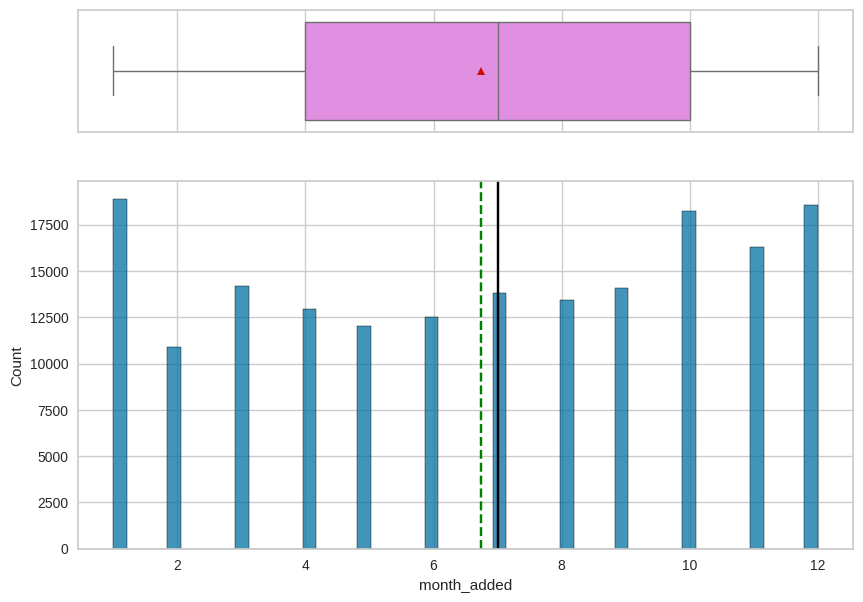

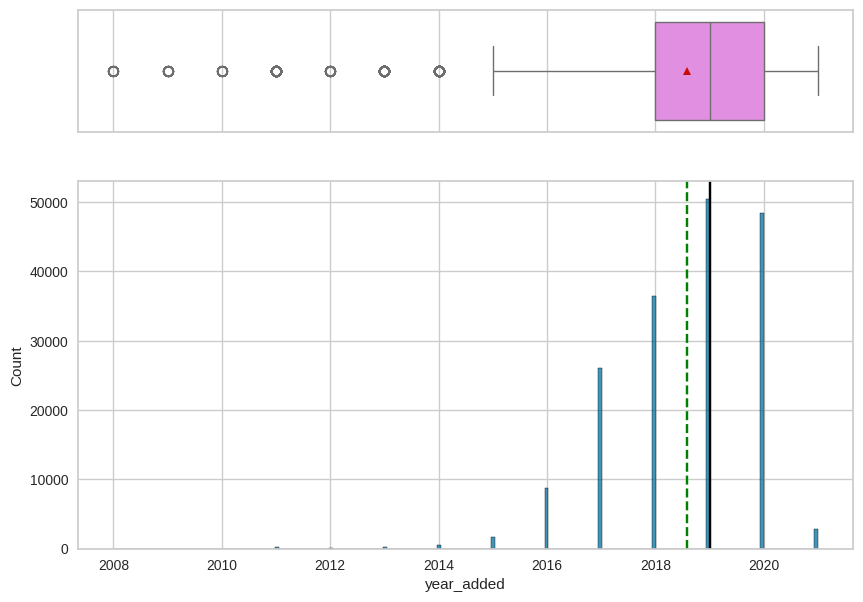

In [137]:
for variable in numeric_columns[:-1]:
  Outlier_detector(temp_df,variable)

##### What all outlier treatment techniques have you used and why did you use those techniques?

> Although we have identified anomalies in continuous features, we won't treat them as outliers. This decision is based on the understanding that some Movies/TV Shows were released or added to Netflix early on, coinciding with the period before widespread digitization occurred. Since digitalization became prevalent after 2010, and almost everyone gained access to the internet, we have chosen not to remove these outliers.

### 3. Categorical Encoding

In [138]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [139]:
# Creating new feature content_detail with the help of other textual attributes
new_df["content_detail"]= new_df["cast"]+" "+new_df["director"]+" "+new_df["listed_in"]+" "+new_df["type"]+" "+new_df["rating"]+" "+new_df["country"]+" "+new_df["description"]

#checking the manipulation
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_detail
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult Content,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult Content,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult Content,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teen Content,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teen Content,123,Dramas,A brilliant group of students become card-coun...,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


#### 2. Lower Casing

In [140]:
# Lower Casing
new_df['content_detail']= new_df['content_detail'].str.lower()

# Checking the manipulation
new_df.iloc[899,]['content_detail']

"adam sandler, joey lauren adams, jon stewart, cole sprouse, dylan sprouse, josh mostel, leslie mann, allen covert, rob schneider, kristy swanson dennis dugan comedies movie teen content united states dumped by his girlfriend because he refuses to accept responsibility, overgrown adolescent sonny koufax adopts a 5-year-old to prove he's a grownup."

#### 3. Removing Punctuations

In [141]:
#@markdown # Removing Punctuations
def remove_punctuations(text):
    '''
    This function removes punctuation marks from the given sentence.

    Parameters:
    - text (str): Input sentence containing punctuation marks.

    Returns:
    - str: Text with punctuation marks removed.
    '''

    # Importing the necessary library
    import string

    # Replace the punctuation marks with no space, effectively deleting them
    translator = str.maketrans('', '', string.punctuation)

    # Return the text stripped of punctuation marks
    return text.translate(translator)


In [142]:
# Removing Punctuations from the content_detail
new_df['content_detail']= new_df['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
new_df.iloc[899,]['content_detail']

'adam sandler joey lauren adams jon stewart cole sprouse dylan sprouse josh mostel leslie mann allen covert rob schneider kristy swanson dennis dugan comedies movie teen content united states dumped by his girlfriend because he refuses to accept responsibility overgrown adolescent sonny koufax adopts a 5yearold to prove hes a grownup'

#### 4. Removing URLs & Removing words and digits contain digits.

In [143]:
#@markdown #  Removing URLs & Removing words and digits contain digits
def remove_url_and_numbers(text):
    '''
    This function removes URLs and numbers from the given sentence.

    Parameters:
    - text (str): Input sentence containing URLs and numbers.

    Returns:
    - str: Text with URLs and numbers removed.
    '''

    # Importing needed libraries
    import re

    # Replacing URLs with no space
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = re.sub(url_pattern, '', text)

    # Replacing digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Return the text stripped of URLs and numbers
    return text


In [144]:
# Remove URLs & Remove words and digits contain digits
new_df['content_detail']= new_df['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
new_df.iloc[899,]['content_detail']

'adam sandler joey lauren adams jon stewart cole sprouse dylan sprouse josh mostel leslie mann allen covert rob schneider kristy swanson dennis dugan comedies movie teen content united states dumped by his girlfriend because he refuses to accept responsibility overgrown adolescent sonny koufax adopts a  yearold to prove hes a grownup'

#### 5. Removing Stopwords & Removing White spaces

In [145]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
#@markdown #  Removing Stopwords & Removing White spaces
def remove_stopwords_and_whitespaces(text):
    '''
    This function removes stopwords from the given sentence.

    Parameters:
    - text (str): Input sentence containing stopwords.

    Returns:
    - str: Text with stopwords removed.
    '''

    # Importing needed libraries
    from nltk.corpus import stopwords
    import re

    # Remove stopwords from the text
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    # Join the list of words with a space separator
    text = " ".join(text)

    # Removing extra whitespaces
    text = re.sub(r'\s+', ' ', text)

    # Return the manipulated string
    return text


In [147]:
# Remove URLs & Remove words and digits contain digits
new_df['content_detail']= new_df['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
new_df.iloc[899,]['content_detail']

'adam sandler joey lauren adams jon stewart cole sprouse dylan sprouse josh mostel leslie mann allen covert rob schneider kristy swanson dennis dugan comedies movie teen content united states dumped girlfriend refuses accept responsibility overgrown adolescent sonny koufax adopts yearold prove hes grownup'

In [148]:
new_df['content_detail'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown international tv shows tv dramas tv scifi fantasy tv show adult content brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Rephrase Text

In [149]:
# Rephrase Text

#### 7. Tokenization

In [150]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
new_df['content_detail']= new_df['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
new_df.iloc[899,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['adam',
 'sandler',
 'joey',
 'lauren',
 'adams',
 'jon',
 'stewart',
 'cole',
 'sprouse',
 'dylan',
 'sprouse',
 'josh',
 'mostel',
 'leslie',
 'mann',
 'allen',
 'covert',
 'rob',
 'schneider',
 'kristy',
 'swanson',
 'dennis',
 'dugan',
 'comedies',
 'movie',
 'teen',
 'content',
 'united',
 'states',
 'dumped',
 'girlfriend',
 'refuses',
 'accept',
 'responsibility',
 'overgrown',
 'adolescent',
 'sonny',
 'koufax',
 'adopts',
 'yearold',
 'prove',
 'hes',
 'grownup']

#### 8. Text Normalization

In [151]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

In [152]:
#@markdown #  lemmatizing sentence
def lemmatizing_sentence(text):
    '''
    This function lemmatizes (transforms into meaningful words) the words in the given sentence.

    Parameters:
    - text (str): Input sentence containing words to be lemmatized.

    Returns:
    - str: Lemmatized text.
    '''

    # Importing needed libraries
    from nltk.stem import WordNetLemmatizer

    # Creating an instance of WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize each word in the text
    text = [lemmatizer.lemmatize(word) for word in text]

    # Join the list of lemmatized words with a space separator
    text = " ".join(text)

    # Return the manipulated string
    return text


In [153]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
new_df['content_detail']= new_df['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
new_df.iloc[899,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'adam sandler joey lauren adam jon stewart cole sprouse dylan sprouse josh mostel leslie mann allen covert rob schneider kristy swanson dennis dugan comedy movie teen content united state dumped girlfriend refuse accept responsibility overgrown adolescent sonny koufax adopts yearold prove he grownup'

##### Which text normalization technique have you used and why?

> For our project, we have chosen to use lemmatization as our main text normalization method.
> * **Accurate Base Word**: Lemmatization was chosen over Stemming as it accurately determines the base form of a word by considering its meaning and context, in contrast to Stemming, which simply removes suffixes.
> * **Handling Inflections**: Lemmatization is capable of handling various inflections such as plurals, verb tenses, and comparative forms, making it suitable for a wide range of language nuances in natural language processing.
> * **Real Word Output**: Unlike Stemming, Lemmatization consistently produces real words that can be found in dictionaries, ensuring that the results of text analysis are linguistically meaningful and easier to interpret.
> * **Improved Text Understanding**: By reducing words to their base form, Lemmatization enhances overall text understanding, aiding in better context comprehension and meaningful analysis.

#### 9. Part of speech tagging

In [154]:
# tokenize the text into words before POS Taging
new_df['pos_tags'] = new_df['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
new_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_detail,pos_tags
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult Content,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,jo miguel bianca comparato michel gomes rodolf...,"[(jo, NN), (miguel, NN), (bianca, NN), (compar..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult Content,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,demi n bichir h ctor bonilla oscar serrano aza...,"[(demi, NN), (n, CC), (bichir, NN), (h, NN), (..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult Content,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",tedd chan stella chung henley hii lawrence koh...,"[(tedd, NN), (chan, NN), (stella, NN), (chung,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teen Content,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",elijah wood john c reilly jennifer connelly ch...,"[(elijah, RB), (wood, NN), (john, NN), (c, VBP..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teen Content,123,Dramas,A brilliant group of students become card-coun...,jim sturgess kevin spacey kate bosworth aaron ...,"[(jim, NN), (sturgess, NN), (kevin, NN), (spac..."


#### 10. Text Vectorization

In [155]:
# Vectorizing Text
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=20000)

In [156]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(new_df['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7777, 20000)


##### Which text vectorization technique have you used and why?

> We have used TF-IDF vectorization over Bag of Words because it considers the significance of each word in a document. TF-IDF assigns higher values to rare words specific to a document, emphasizing their importance in representation. This approach provides a more nuanced and informative representation of the text compared to the simpler Bag of Words method.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [157]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [158]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [159]:
# Transform Your data

### 6. Data Scaling

In [160]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

> In the textual data processing, the text vectorization process generates a substantial 40,000 attributes. Dealing with such an extensive number of columns on local machines becomes impractical. To address this challenge, we employ Principal Component Analysis (PCA) techniques to effectively reduce the dimensions of the resulting large and sparse matrix, allowing for more manageable and efficient processing.

In [161]:
# DImensionality Reduction (If needed)
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.60256707e-02 4.44498217e-03 3.63055266e-03 ... 1.89091134e-35
 4.24495034e-36 7.47462682e-38]


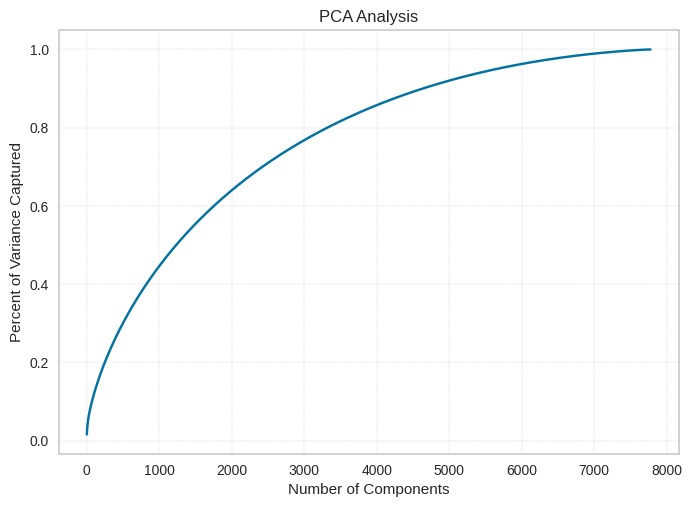

In [162]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

> It is clear from the above plot that 7770 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [163]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7777, 5649)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

> * **PCA for Dimensionality Reduction**: We employed Principal Component Analysis (PCA) as a widely-used technique to reduce the dimensionality of high-dimensional datasets.
> * **Capture Maximum Variation**: PCA identifies principal components, which are linear combinations of original features capturing the maximum variation in the data. This allows for a reduction in dimensions while preserving most of the information.
> * **implicity and Efficiency**: PCA is favored for its simplicity, computational efficiency, and widespread availability in data analysis software. Its strong theoretical foundation and extensive study contribute to its reliability as a well-understood method for dimensionality reduction.

### 8. Data Splitting

In [164]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [165]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1  (K-Means Clustering)

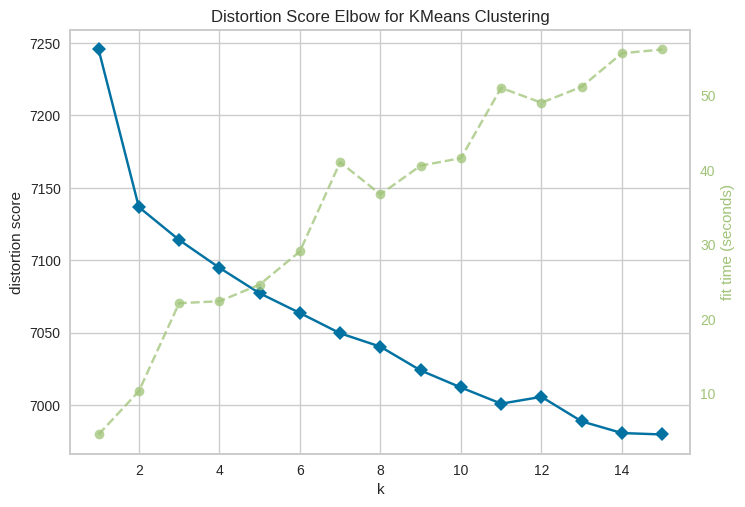

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [176]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [167]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [168]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [169]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [170]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [171]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [172]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [173]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [174]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [175]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***